c:\Users\Juanb\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
c:\Users\Juanb\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
c:\Users\Juanb\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\Users\Juanb\AppData\Local\Temp\ipykernel_13936\1634007576.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
C:\Users\Juanb\AppData\Local\Temp\ipykernel_13936\1634007576.py:17: UserWarning: Could not infer form

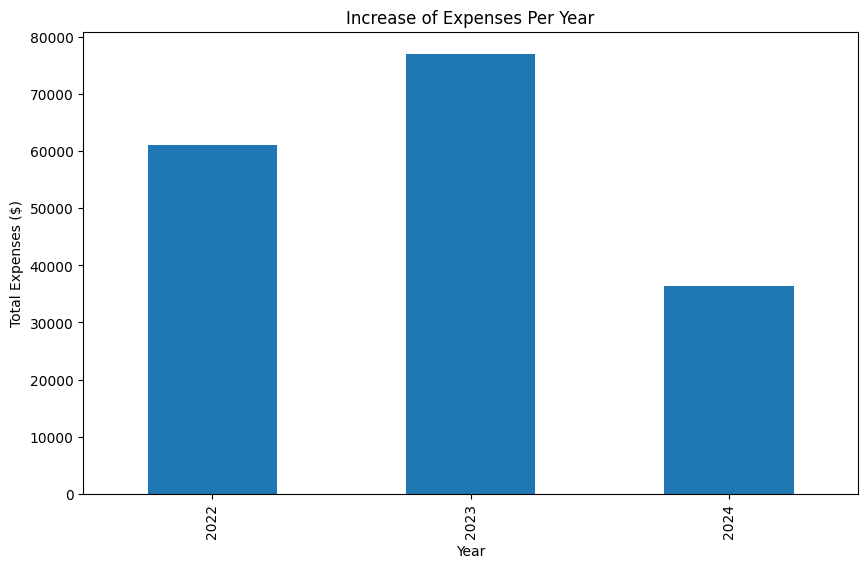

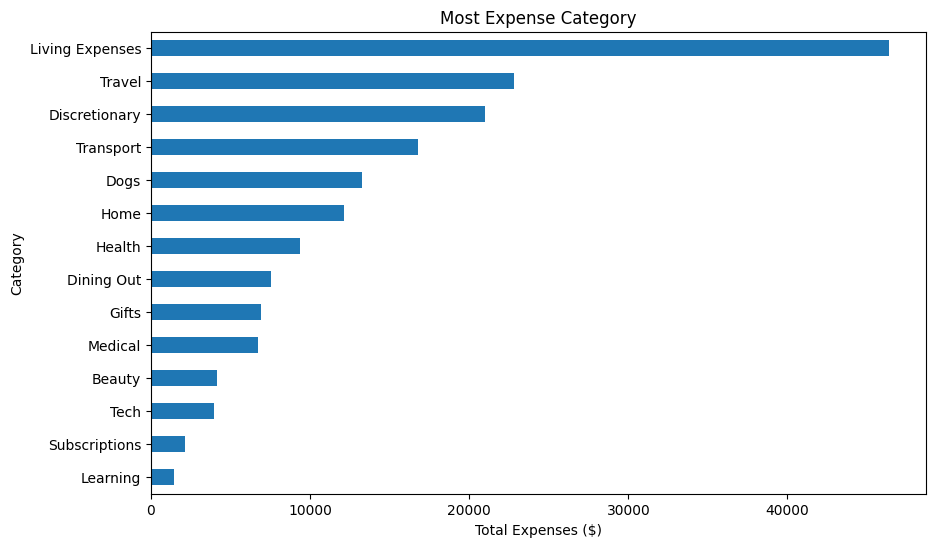

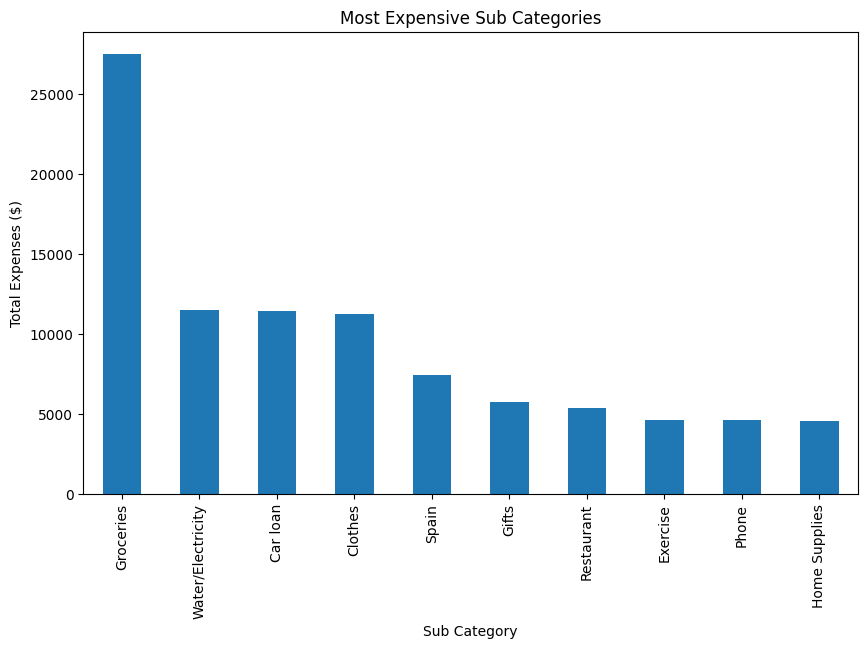

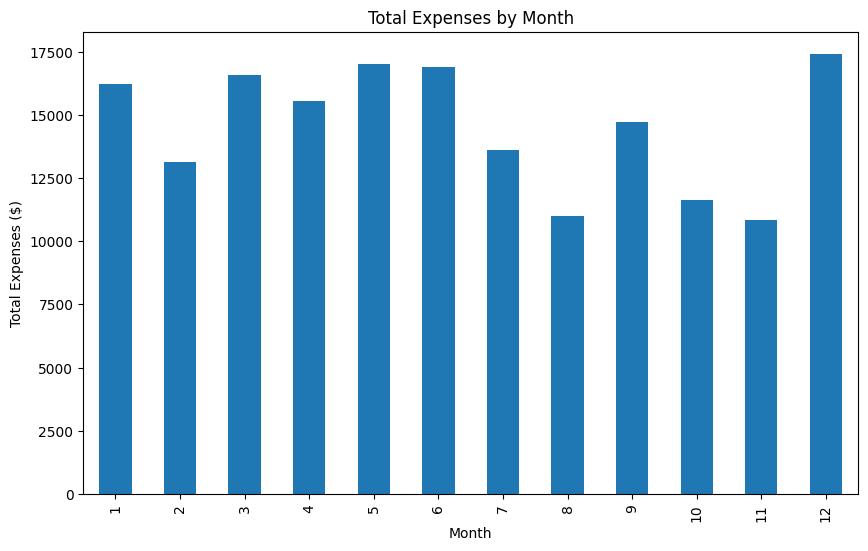

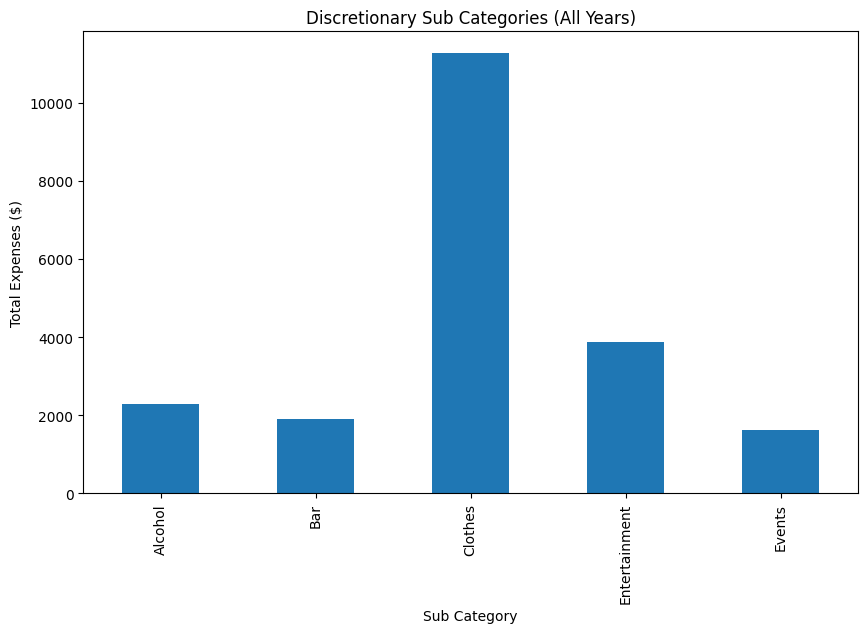

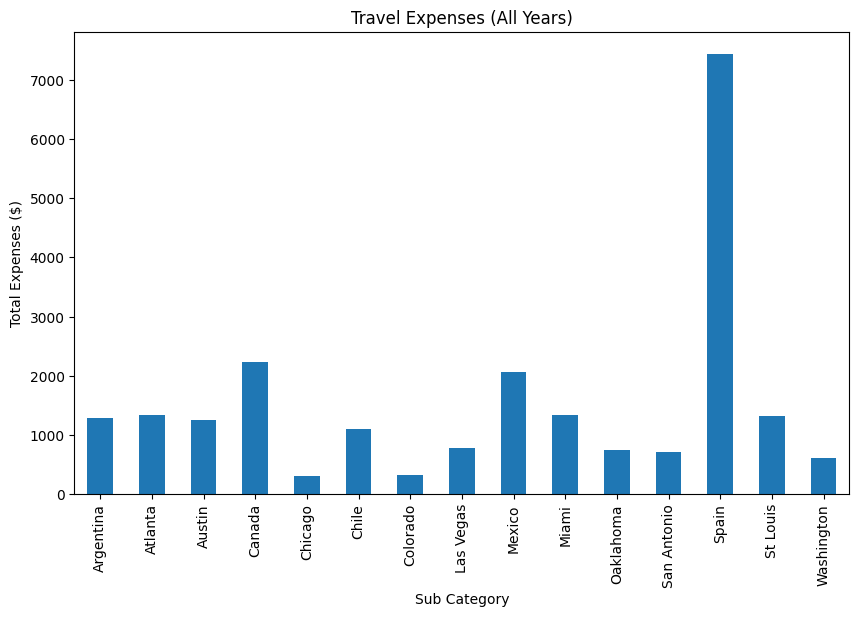

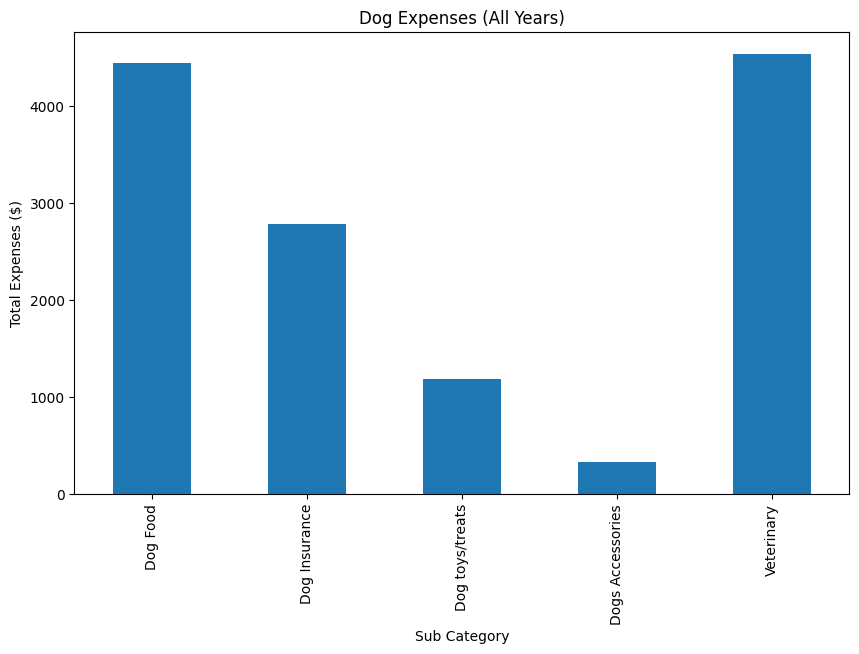

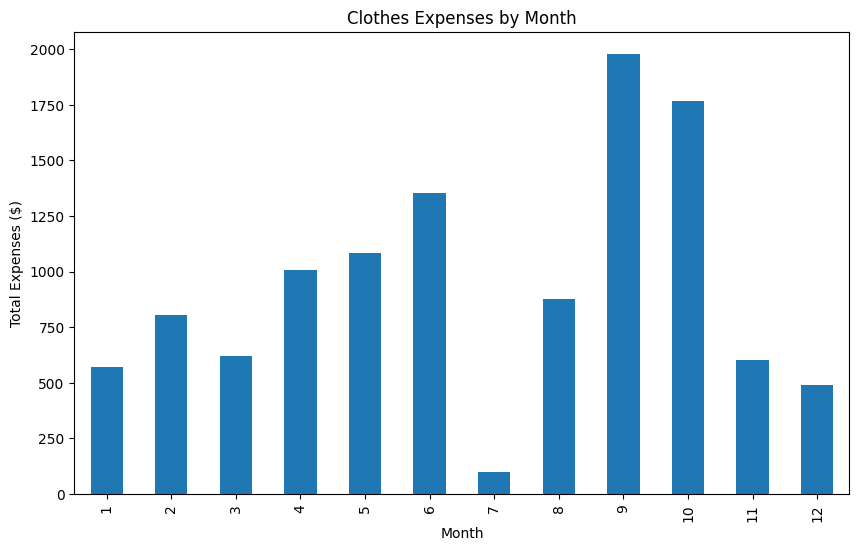

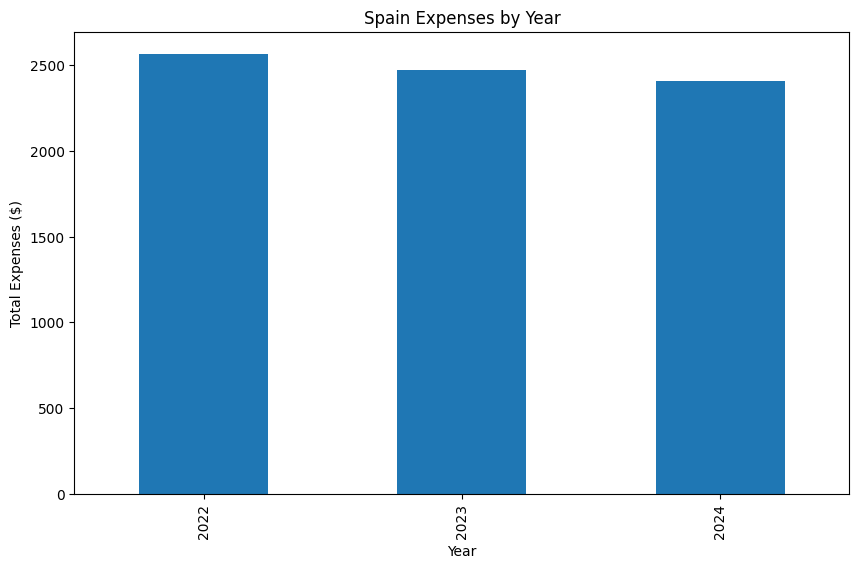

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Excel files
file_2022 = 'data/Expenses 2022.xlsx'
file_2023 = 'data/Expenses 2023.xlsx'
file_2024 = 'data/Expenses 2024.xlsx'

data_2022 = pd.read_excel(file_2022)
data_2023 = pd.read_excel(file_2023)
data_2024 = pd.read_excel(file_2024)

# Function to clean data
def clean_data(df):
    df = df.drop(columns=['Unnamed: 0'])
    df.columns = ['Date', 'Amount', 'Sub Category', 'Category']
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    return df

# Clean each dataset
data_2022_clean = clean_data(data_2022)
data_2023_clean = clean_data(data_2023)
data_2024_clean = clean_data(data_2024)

# Combine the datasets
combined_data = pd.concat([data_2022_clean, data_2023_clean, data_2024_clean], ignore_index=True)

# Convert the Amount column to numeric, forcing errors to NaN and then filling with 0
combined_data['Amount'] = pd.to_numeric(combined_data['Amount'], errors='coerce').fillna(0)

# Drop rows where Date is NaT
combined_data = combined_data.dropna(subset=['Date'])

# Add Year and Month columns
combined_data['Year'] = combined_data['Date'].dt.year
combined_data['Month'] = combined_data['Date'].dt.month

# Correct subcategory "bar" to "Bar"
combined_data['Sub Category'] = combined_data['Sub Category'].replace('bar', 'Bar')

# Drop specified categories
categories_to_drop = ['Government', 'Debt', 'Moving', 'Venezuela', 'Argentina', 'Savings', 'Charity']
filtered_data = combined_data[~combined_data['Category'].isin(categories_to_drop)]

# Exclude Rent from analysis
filtered_data = filtered_data[filtered_data['Sub Category'] != 'Rent']

# Path to save PNG files
save_path = 'data/Plots/'

# Increase of expenses per year
yearly_expenses = filtered_data.groupby('Year')['Amount'].sum()
plt.figure(figsize=(10, 6))
yearly_expenses.plot(kind='bar')
plt.title('Increase of Expenses Per Year')
plt.xlabel('Year')
plt.ylabel('Total Expenses ($)')
plt.savefig(f'{save_path}increase_expenses_per_year.png')
plt.show()

# Most expense category
category_expenses = filtered_data.groupby('Category')['Amount'].sum().sort_values()
plt.figure(figsize=(10, 6))
category_expenses.plot(kind='barh')
plt.title('Most Expense Category')
plt.xlabel('Total Expenses ($)')
plt.ylabel('Category')
plt.savefig(f'{save_path}most_expense_category.png')
plt.show()

# Most expensive sub-categories
top_sub_categories = filtered_data.groupby('Sub Category')['Amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_sub_categories.plot(kind='bar')
plt.title('Most Expensive Sub Categories')
plt.xlabel('Sub Category')
plt.ylabel('Total Expenses ($)')
plt.savefig(f'{save_path}most_expensive_sub_categories.png')
plt.show()

# Total expenses by month regardless of the year
monthly_expenses = filtered_data.groupby('Month')['Amount'].sum()
plt.figure(figsize=(10, 6))
monthly_expenses.plot(kind='bar')
plt.title('Total Expenses by Month')
plt.xlabel('Month')
plt.ylabel('Total Expenses ($)')
plt.savefig(f'{save_path}total_expenses_by_month.png')
plt.show()

# Discretionary sub-categories list (all years)
discretionary_sub_categories = filtered_data[filtered_data['Category'] == 'Discretionary'].groupby('Sub Category')['Amount'].sum()
plt.figure(figsize=(10, 6))
discretionary_sub_categories.plot(kind='bar')
plt.title('Discretionary Sub Categories (All Years)')
plt.xlabel('Sub Category')
plt.ylabel('Total Expenses ($)')
plt.savefig(f'{save_path}discretionary_sub_categories.png')
plt.show()

# Travel expenses all years
travel_expenses = filtered_data[filtered_data['Category'] == 'Travel'].groupby('Sub Category')['Amount'].sum()
plt.figure(figsize=(10, 6))
travel_expenses.plot(kind='bar')
plt.title('Travel Expenses (All Years)')
plt.xlabel('Sub Category')
plt.ylabel('Total Expenses ($)')
plt.savefig(f'{save_path}travel_expenses.png')
plt.show()

# Dog expenses all years
dog_expenses = filtered_data[filtered_data['Category'] == 'Dogs'].groupby('Sub Category')['Amount'].sum()
plt.figure(figsize=(10, 6))
dog_expenses.plot(kind='bar')
plt.title('Dog Expenses (All Years)')
plt.xlabel('Sub Category')
plt.ylabel('Total Expenses ($)')
plt.savefig(f'{save_path}dog_expenses.png')
plt.show()

# Clothes expenses through different months of the year
clothes_expenses = filtered_data[filtered_data['Sub Category'] == 'Clothes'].groupby('Month')['Amount'].sum()
plt.figure(figsize=(10, 6))
clothes_expenses.plot(kind='bar')
plt.title('Clothes Expenses by Month')
plt.xlabel('Month')
plt.ylabel('Total Expenses ($)')
plt.savefig(f'{save_path}clothes_expenses_by_month.png')
plt.show()

# Spain expenses through different years
spain_expenses = filtered_data[filtered_data['Sub Category'] == 'Spain'].groupby('Year')['Amount'].sum()
plt.figure(figsize=(10, 6))
spain_expenses.plot(kind='bar')
plt.title('Spain Expenses by Year')
plt.xlabel('Year')
plt.ylabel('Total Expenses ($)')
plt.savefig(f'{save_path}spain_expenses_by_year.png')
plt.show()
